# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree model is able
to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the range
of feature values seen during the training.

We first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at 3
levels for the decision tree.

In [2]:
# Write your code here.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_model = LinearRegression()
tree = DecisionTreeRegressor(max_depth=3)

linear_model.fit(data_train, target_train)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a synthetic dataset containing all possible flipper length from the
minimum to the maximum of the training dataset. Get the predictions of each
model using this dataset.

In [38]:
# Write your code here.
import numpy as np

data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()),
    columns=[feature_name],
)

target_predicted_linear = linear_model.predict(data_test)
target_predicted_tree = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

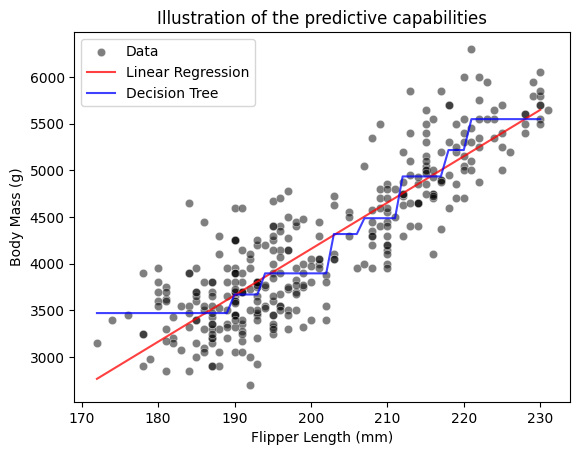

In [40]:
# Write your code here.
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data_train.values.reshape(-1), y=target_train.values.reshape(-1), color="black", alpha=0.5, label='Data')
sns.lineplot(x=data_test.values.reshape(-1), y=target_predicted_linear, color='red', alpha=0.75, label='Linear Regression')
sns.lineplot(x=data_test.values.reshape(-1), y=target_predicted_tree, color='blue', alpha=0.75, label='Decision Tree')
_ = plt.title("Illustration of the predictive capabilities")
_ = plt.xlabel(feature_name)
_ = plt.ylabel(target_name)
_ = plt.legend()


Now, we check the extrapolation capabilities of each model. Create a dataset
containing a broader range of values than your previous dataset, in other
words, add values below and above the minimum and the maximum of the flipper
length seen during training.

In [23]:
# Write your code here.
ext = 0.25 # defines a percentage to extrapolate points.
data_test = pd.DataFrame(
    np.arange((1-ext)*data_train[feature_name].min(), (1+ext)*data_train[feature_name].max()),
    columns=[feature_name],
)

target_predicted_linear = linear_model.predict(data_test)
target_predicted_tree = tree.predict(data_test)

Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

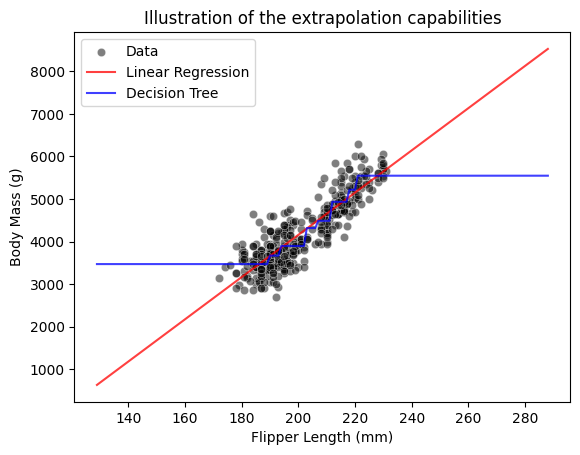

In [37]:
# Write your code here.
sns.scatterplot(x=data_train.values.reshape(-1), y=target_train.values.reshape(-1), color="black", alpha=0.5, label='Data')
sns.lineplot(x=data_test.values.reshape(-1), y=target_predicted_linear, color='red', alpha=0.75, label='Linear Regression')
sns.lineplot(x=data_test.values.reshape(-1), y=target_predicted_tree, color='blue', alpha=0.75, label='Decision Tree')
_ = plt.title("Illustration of the extrapolation capabilities")
_ = plt.xlabel(feature_name)
_ = plt.ylabel(target_name)
_ = plt.legend()